In [29]:
import os, struct
import matplotlib as plt
from array import array as pyarray
import pandas as pd
from openpyxl import load_workbook
from pylab import *
import numpy as np

In [30]:
def load_NMNIST(dataset="training", digits=range(10), path=r'E:\Users\Shashi\OneDrive\Datasets\Shapes'):
    
    if dataset == "training":
        fname_img = os.path.join(path, 'Shapes_1_1_Train_Features.dat')
        fname_lbl = os.path.join(path, 'Shapes_1_1_Train_Labels.dat')
    elif dataset == "testing":
        fname_img = os.path.join(path, 'Shapes_1_1_Test_Features.dat')
        fname_lbl = os.path.join(path, 'Shapes_1_1_Test_Labels.dat')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    lbl = np.fromfile(flbl, dtype=np.uint8)
    flbl.close()

    fimg = open(fname_img, 'rb')
    img = np.fromfile(fimg, dtype=np.uint8)
    fimg.close()

    size=len(lbl)

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    rows=28;cols=28;

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]
    return images, labels

In [31]:
def vectortoimg(v,show=True):
    plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

In [32]:
import keras

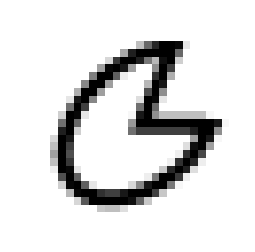

In [33]:
path= os.path.join(os.path.curdir, 'data')
images, labels = load_NMNIST('training', digits=[0,1,2], path=path)

flatimages = list()
for i in images:
    flatimages.append(i.ravel())
x_train = asarray(flatimages) # X now contains 60000 feature vectors, each of dimension 784
y_train=labels # T contains class labels with 0->Triangle, 1->Square, 2->Pizza
vectortoimg(x_train[1])

print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure(figsize=(10,10))
nrows=15
ncols=15
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        vectortoimg(x_train[np.random.randint(len(y_train))],show=False)
plt.show()

In [34]:
images.shape

(60000, 28, 28)

In [35]:
labels.shape

(60000, 1)

In [36]:
images, labels = load_NMNIST('testing', digits=[0,1,2], path=path)
flatimages = list()
for i in images:
    flatimages.append(i.ravel())
x_test = asarray(flatimages) # X now contains 60000 feature vectors, each of dimension 784
y_test = labels # T contains class labels with 0->Triangle, 1->Square, 2->Pizza

In [37]:
from keras.layers import Input, Dense
from keras.models import Model

## single fully-connected neural layer as encoder and as decoder

In [38]:
# this is the size of our encoded representations
encoding_dim = 32  # 3 floats -> 3 floats represents 3 classes

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

## Let's also create a separate encoder model

In [39]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

## decoder model

In [40]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

## Use Crossentropy loss, and Adadelta Optimizer

In [41]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [42]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Train

In [43]:
autoencoder.fit(x_train, x_train,
                epochs=300,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 2s 31us/step - loss: 0.3984 - val_loss: 0.2993
Epoch 2/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.3118 - val_loss: 0.2869
Epoch 3/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.2946 - val_loss: 0.2637
Epoch 4/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.2776 - val_loss: 0.2441
Epoch 5/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.2679 - val_loss: 0.2299
Epoch 6/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.2622 - val_loss: 0.2217
Epoch 7/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.2584 - val_loss: 0.2165
Epoch 8/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.2548 - val_loss: 0.2128
Epoch 9/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.2507 - val_loss: 0.2096
Epoc

Epoch 78/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1252 - val_loss: 0.1098
Epoch 79/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1249 - val_loss: 0.1095
Epoch 80/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1247 - val_loss: 0.1095
Epoch 81/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1245 - val_loss: 0.1091
Epoch 82/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1242 - val_loss: 0.1093
Epoch 83/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1240 - val_loss: 0.1092
Epoch 84/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1238 - val_loss: 0.1094
Epoch 85/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1236 - val_loss: 0.1093
Epoch 86/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1234 - val_loss: 0.1088
Epoch 87/300
60000/60000 [====================

60000/60000 [==============================] - 0s 7us/step - loss: 0.1152 - val_loss: 0.1087
Epoch 231/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1152 - val_loss: 0.1088
Epoch 232/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1152 - val_loss: 0.1088
Epoch 233/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1152 - val_loss: 0.1087
Epoch 234/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1151 - val_loss: 0.1088
Epoch 235/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1151 - val_loss: 0.1087
Epoch 236/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1151 - val_loss: 0.1088
Epoch 237/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1151 - val_loss: 0.1089
Epoch 238/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.1151 - val_loss: 0.1085
Epoch 239/300
60000/60000 [========================

In [44]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

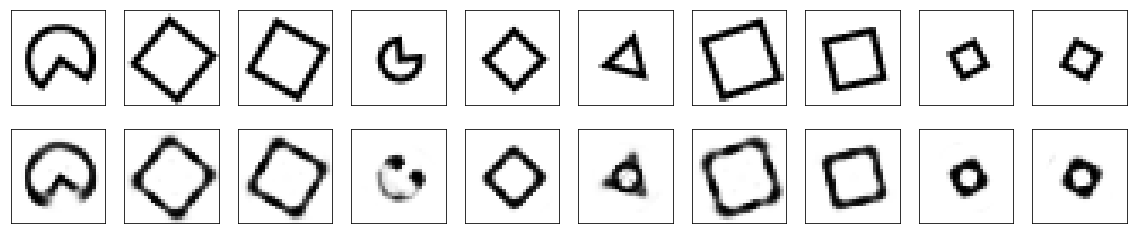

In [45]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
def acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    print(D)
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    print(w)
    from sklearn.utils.linear_assignment_ import linear_assignment
    ind = linear_assignment(w.max() - w)
    print([w[i, j] for i, j in ind])
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

In [47]:
from  sklearn import metrics
from sklearn.cluster import KMeans
result = np.zeros((len(y_test), 2))
for index, item in enumerate(y_test):
    result[index] = (y_test[index], np.max(encoded_imgs[index]))

kmeans = KMeans(n_clusters=3, n_init=20)
y_pred = kmeans.fit_predict((encoded_imgs))
print(acc(y_test, y_pred))
result.shape

3
[[1533 1058  744]
 [ 888 1086 1822]
 [ 969 1149  751]]
[1533, 1822, 1149]
0.4504


(10000, 2)

In [48]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.3479 - val_loss: 0.2875
Epoch 2/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2944 - val_loss: 0.2784
Epoch 3/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2780 - val_loss: 0.2548
Epoch 4/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2690 - val_loss: 0.2527
Epoch 5/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2653 - val_loss: 0.2482
Epoch 6/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2627 - val_loss: 0.2386
Epoch 7/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2609 - val_loss: 0.2349
Epoch 8/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2594 - val_loss: 0.2273
Epoch 9/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2567 - val_loss: 0.2

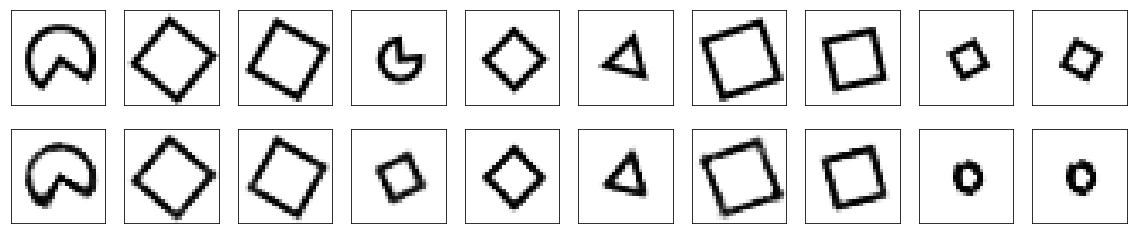

In [49]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [50]:
kmeans = KMeans(n_clusters=3, n_init=20)
y_pred = kmeans.fit_predict((encoded_imgs))
print(acc(y_test, y_pred))
result.shape

3
[[1841 1387 1067]
 [1549 1179  792]
 [   0  727 1458]]
[1841, 1179, 1458]
0.4478


(10000, 2)

In [51]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [52]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [53]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.3024 - val_loss: 0.2008
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2004 - val_loss: 0.1496
Epoch 3/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1683 - val_loss: 0.1418
Epoch 4/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1526 - val_loss: 0.1243
Epoch 5/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1434 - val_loss: 0.1214
Epoch 6/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1365 - val_loss: 0.1145
Epoch 7/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1311 - val_loss: 0.1102
Epoch 8/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1277 - val_loss: 0.1106
Epoch 9/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1241 - val_loss: 0.1113
Epoch

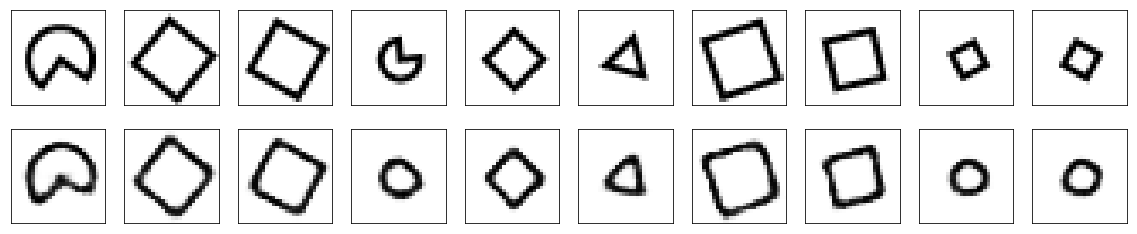

In [54]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [55]:
encoded_imgs = np.reshape(encoded_imgs, (len(x_test), 28*28*1))  # adapt this if using `channels_first` image data format


In [64]:
%%timeit
kmeans = KMeans(n_clusters=3, n_init=20)
y_pred = kmeans.fit_predict((encoded_imgs))

1 loop, best of 3: 5.5 s per loop


In [57]:
print(acc(y_test, y_pred))
result.shape

3
[[   0  790 1497]
 [1808 1269 1097]
 [1582 1234  723]]
[1497, 1808, 1234]
0.4539


(10000, 2)

In [58]:
x_train = np.reshape(x_train, (len(x_train), 28*28*1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28*28*1))  # adapt this if using `channels_first` image data format
est = KMeans(n_clusters=3, n_jobs=20)
y_pred = est.fit(x_train).predict(x_test)

In [59]:
print(acc(y_test, y_pred))

3
[[ 458  559 1427]
 [ 282  918  675]
 [2650 1816 1215]]
[1427, 918, 2650]
0.4995


In [60]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [63]:
%%timeit
pca = PCA(n_components=3).fit(x_train)
est = KMeans(init=pca.components_, n_clusters=3, n_init=20)
y_pred = est.fit(x_train).predict(x_test)

1 loop, best of 3: 4.83 s per loop


In [62]:
print(acc(y_test, y_pred))

3
[[ 458  559 1427]
 [2650 1816 1215]
 [ 282  918  675]]
[1427, 2650, 918]
0.4995


In [75]:
print "Doing PCA would improve performance by", np.round(((5.5-4.83)/5.5)*100, 2)

Doing PCA would improve performance by 12.18


In [80]:
keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)